In [1]:
import numpy as np
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
from src.uilc import *

def print_mesh_point(arr):
    for line in arr:
        for element in line:
            print(f"({element[0]:.2}, {element[1]:.2})", end = "")
        print(":\n")
Nx = 6
Ny = 3
xarr=  np.linspace(-4, 4, Nx)
yarr = np.linspace( -2, 2, Ny)


In [2]:
source_array = PositionArray.from_arrays(xarr, yarr)

In [3]:
print_mesh_point(source_array)

(-4.0, 2.0)(-2.4, 2.0)(-0.8, 2.0)(0.8, 2.0)(2.4, 2.0)(4.0, 2.0):

(-4.0, 0.0)(-2.4, 0.0)(-0.8, 0.0)(0.8, 0.0)(2.4, 0.0)(4.0, 0.0):

(-4.0, -2.0)(-2.4, -2.0)(-0.8, -2.0)(0.8, -2.0)(2.4, -2.0)(4.0, -2.0):



In [4]:
mesh_x, mesh_y = np.meshgrid(xarr, yarr, indexing="ij")
mesh_xt, mesh_yt = np.meshgrid(xarr, yarr, indexing="xy")

In [5]:
p = PositionArray.from_meshgrid(mesh_x, mesh_y, indexing="ij")
print_mesh_point(p)

(-4.0, 2.0)(-2.4, 2.0)(-0.8, 2.0)(0.8, 2.0)(2.4, 2.0)(4.0, 2.0):

(-4.0, 0.0)(-2.4, 0.0)(-0.8, 0.0)(0.8, 0.0)(2.4, 0.0)(4.0, 0.0):

(-4.0, -2.0)(-2.4, -2.0)(-0.8, -2.0)(0.8, -2.0)(2.4, -2.0)(4.0, -2.0):



In [6]:
puniform = PositionArray.uniform((2, 1), (Nx, Ny))
xarr_m = puniform.get_axis_list("x")
yarr_m = puniform.get_axis_list("y")
xarr_mesh, yarr_mesh = np.meshgrid(xarr_m, yarr_m, indexing="xy")
m = PositionArray.from_meshgrid(xarr_mesh, yarr_mesh, indexing="xy")
print_mesh_point(m)

(-5.0, -1.0)(-3.0, -1.0)(-1.0, -1.0)(1.0, -1.0)(3.0, -1.0)(5.0, -1.0):

(-5.0, 0.0)(-3.0, 0.0)(-1.0, 0.0)(1.0, 0.0)(3.0, 0.0)(5.0, 0.0):

(-5.0, 1.0)(-3.0, 1.0)(-1.0, 1.0)(1.0, 1.0)(3.0, 1.0)(5.0, 1.0):



In [7]:
print_mesh_point(puniform)

(-5.0, 1.0)(-3.0, 1.0)(-1.0, 1.0)(1.0, 1.0)(3.0, 1.0)(5.0, 1.0):

(-5.0, 0.0)(-3.0, 0.0)(-1.0, 0.0)(1.0, 0.0)(3.0, 0.0)(5.0, 0.0):

(-5.0, -1.0)(-3.0, -1.0)(-1.0, -1.0)(1.0, -1.0)(3.0, -1.0)(5.0, -1.0):



In [8]:
puniform[0][5]

PositionArray([5., 1.])

In [9]:
s = 2
h = 1

In [10]:
lamber_pattern = lambda d: Radiation.lambertian(s, h, d)

In [11]:
X, Y = Utils.plane_meshgrid((-2, 2), (-6, 6), (300, 400))

In [12]:
Z = puniform.intensity_on((X,Y), lamber_pattern)

In [13]:
Z_sources = puniform.intensity_on((X,Y), lambda d: Radiation.gaussian(1, 0.06, d)/Radiation.gaussian(1, 0.001, 0))

In [14]:
import matplotlib.pyplot as plt

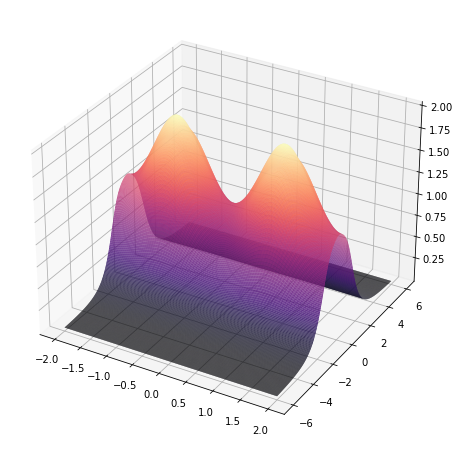

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, 2* Z/Z.max(), rstride= 1, cstride =1, cmap='magma', edgecolor='none')
#ax.plot_surface(X, Y, Z_sources/Z_sources.max())